In [1]:
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import dill
import plotly.graph_objects as go

import torch
import pyro
import pyro.distributions as dist
from pyro.infer.autoguide import AutoNormal, AutoMultivariateNormal, AutoDelta
from pyro.infer import SVI, Trace_ELBO, Predictive
from pyro.optim import Adam
from chirho.indexed.handlers import IndexPlatesMessenger
from chirho.counterfactual.handlers import MultiWorldCounterfactual
from chirho.indexed.ops import IndexSet, gather, indices_of
from chirho.interventional.handlers import do
from chirho.observational.handlers import condition


from cities.utils.data_grabber import (DataGrabber, list_available_features, list_tensed_features, list_interventions, list_outcomes)
from cities.utils.cleaning_utils import check_if_tensed, find_repo_root
from cities.queries.causal_insight import CausalInsight
from cities.modeling.model_interactions import model_cities_interaction
from cities.modeling.model_interactions import InteractionsModel
from cities.modeling.modeling_utils import (prep_wide_data_for_inference, train_interactions_model)
from cities.utils.cleaning_utils import find_repo_root


In [2]:

# outcome_dataset= 'industry_transportation_warehousing_total'
# intervention_dataset='spending_transportation'
# forward_shift = 3

ci = CausalInsight(
    #outcome_dataset = 'unemployment_rate',
    #intervention_dataset='spending_commerce'
    #outcome_dataset='gdp',
    #intervention_dataset='spending_HHS'
    outcome_dataset= 'industry_transportation_warehousing_total',
    intervention_dataset='spending_transportation'
    )

ci.load_guide(forward_shift=2)
ci.generate_samples()


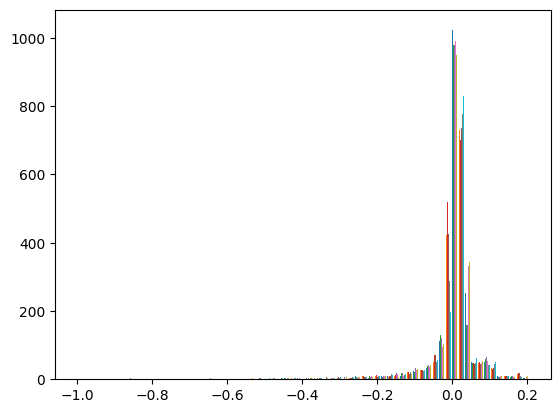

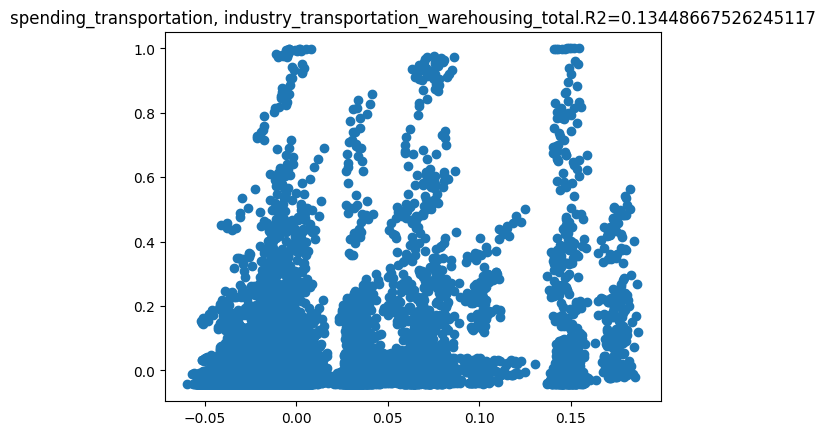

In [3]:
ci.plot_residuals()
ci.predictive_check()


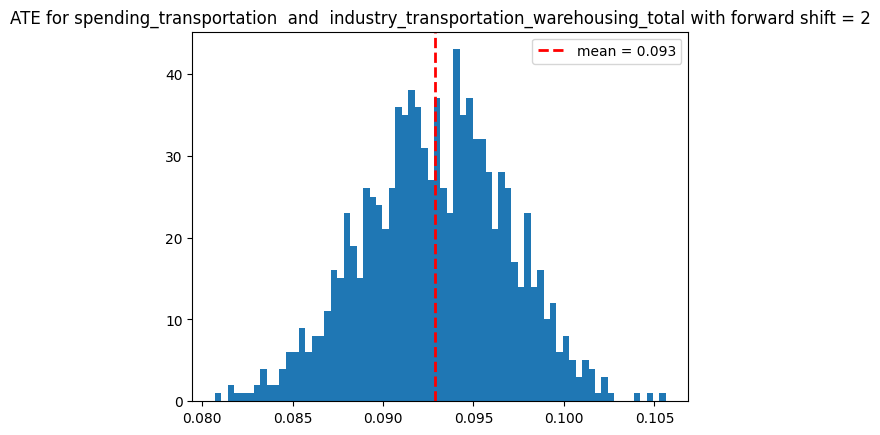

In [4]:
ci.estimate_ATE()

In [5]:
ci.generate_tensed_samples()

In [6]:
ci.data['years_available']

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [8]:
ci.get_fips_predictions(intervened_value=.9, fips = 1005)

display(ci.predictions)

8


,year,observed,mean,low,high
2018,2018,-0.033308,-0.033308,-0.033308,-0.033308
2019,2019,-0.034304,0.052460,0.045682,0.058617
2020,2020,-0.035173,0.050033,0.042776,0.057479
2021,2021,-0.034198,0.048427,0.039296,0.057215


In [9]:
ci.plot_predictions(range_multiplier=2)